# Titanic 生还者预测

by Allen.Huang

1.数据了解/查看

2.数据清洗和填充

3.Baseline的机器学习

4.EDA+特征工程

5.机器学习的调优(XGBoostClassifier)

6.其他的分类模型(RT,LR,SVM...)

7.Stacking集成

8.模型评测(PR/Fscore/ROC)

9.voting+提交

## 1.数据查看

In [4]:
import pandas as pd

import numpy as np 

import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

In [5]:
train=pd.read_csv('./data/data.csv')

In [7]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## 2.空值填充

In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
train.shape

train1=train.copy()

### 1. Age的填充

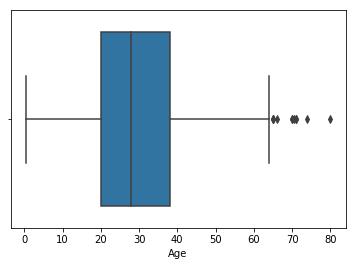

In [11]:
sns.boxplot(train['Age'])

关于连续性的变量有几种选择：

1.median填充

2.mean填充

3.高频填充mode()

4.mean()+random()*std



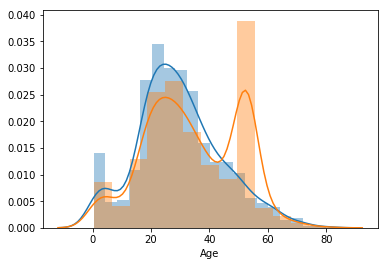

In [36]:
### 年龄分布

sns.distplot(train['Age'].dropna())

### 均值填充

# sns.distplot(train['Age'].fillna(train['Age'].mean()))

# # ### 中值填充

# sns.distplot(train['Age'].fillna(train['Age'].median()))

# # ### 高频值填充

# sns.distplot(train['Age'].fillna(train['Age'].mode()[0]))

# ### 随机填充

sns.distplot(train['Age'].fillna(np.random.normal(train['Age'].mean(),train['Age'].std())))

#应该生成177个随机数，并填入到空值中，但是随机填充具有一定缺点，可能会引入噪声

In [37]:
np.random.normal(train['Age'].mean(),train['Age'].std())

57.340337401027696

### 年龄与票类型之间的关系

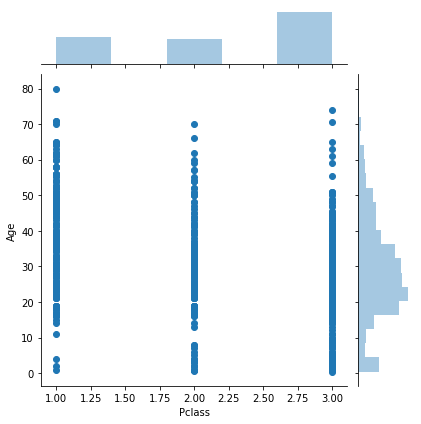

In [38]:
sns.jointplot('Pclass','Age',data=train)

In [40]:
train1['Age']=train['Age'].fillna(train['Age'].median())

In [41]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [42]:
train1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 2.Embark的填充

In [43]:
train1.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.034212,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000


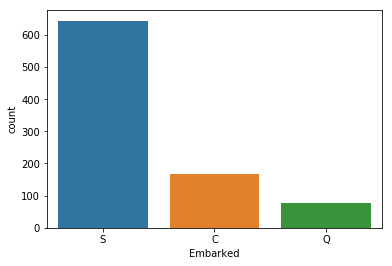

In [45]:
## Embark 数量统计

sns.countplot(train1['Embarked'])

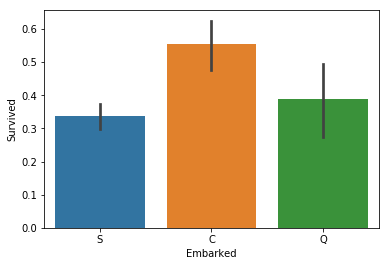

In [46]:
sns.barplot('Embarked','Survived',data=train1)

In [47]:

train1[train1.Embarked!=train1.Embarked]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [51]:
#尝试使用票价和Pclass来进行判断
#train1[(train1.Fare>=60.0)&(train1.Pclass==1)]
#发现没有办法确定Embarked的位置

使用高频填充

In [52]:
train1['Embarked']=train1['Embarked'].fillna(train1['Embarked'].mode()[0])

In [53]:
train1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

### 3.Cabin填充

In [54]:
train1['Cabin'].isnull().sum()

687

In [55]:
train1['Cabin'].mode()

0        B96 B98
1    C23 C25 C27
2             G6
dtype: object

In [56]:
train1=train1.drop(['Cabin'],axis=1)

In [57]:
train1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [58]:
train1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### BaselineModel 构建

In [59]:
y=train1['Survived']
X=pd.get_dummies(train1.drop(['PassengerId','Name','Survived','Ticket'],axis=1))

In [60]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
5,3,28.0,0,0,8.4583,0,1,0,1,0
6,1,54.0,0,0,51.8625,0,1,0,0,1
7,3,2.0,3,1,21.0750,0,1,0,0,1
8,3,27.0,0,2,11.1333,1,0,0,0,1
9,2,14.0,1,0,30.0708,1,0,1,0,0


In [61]:
### 训练集和评测集制作
from sklearn import model_selection

X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.2,random_state=123)

In [62]:
import xgboost as xgb

In [64]:
xgclass=xgb.XGBClassifier()

In [65]:
xgclass.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [66]:
preds=xgclass.predict(X_test)

In [70]:
#xgclass.predict_proba(X_test)

In [68]:
#preds

In [71]:
accuracy=(preds==y_test).sum().astype(float)/len(preds)*100

In [72]:
accuracy

86.03351955307262

In [73]:
def TrainAndTestByXGBoost(train1):
    y=train1['Survived']
    X=pd.get_dummies(train1.drop(['Name','PassengerId','Survived','Ticket'],axis=1))
    X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.2,random_state=123)
    xgclass=xgb.XGBClassifier()
    xgclass.fit(X_train,y_train)
    preds=xgclass.predict(X_test)
    accuracy=(preds==y_test).sum().astype(float)/len(preds)*100
    print("Accuracy:",accuracy)
    

In [74]:
TrainAndTestByXGBoost(train1)

Accuracy: 86.03351955307262


### EDA和特征工程

In [76]:
train1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### 1.Fare对Target的影响

/Users/deepglint/miniconda2/envs/python3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


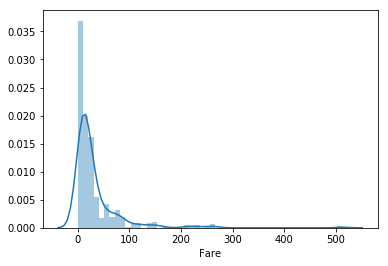

In [77]:
sns.distplot(train1['Fare'])

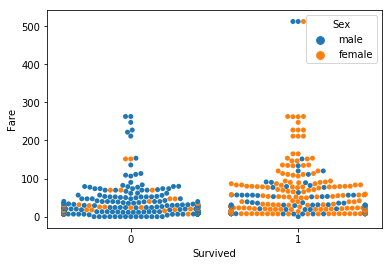

In [78]:
sns.swarmplot('Survived','Fare',data=train1,hue='Sex')

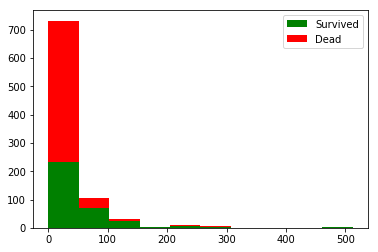

In [79]:
plt.hist(x = [train1[train1['Survived']==1]['Fare'], train1[train1['Survived']==0]['Fare']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.legend()

男性活下来的少，有钱人较容易活下来，女性较容易活下来

### 年龄对于Target的影响

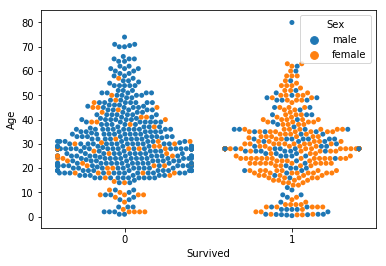

In [80]:
sns.swarmplot('Survived','Age',data=train1,hue='Sex')

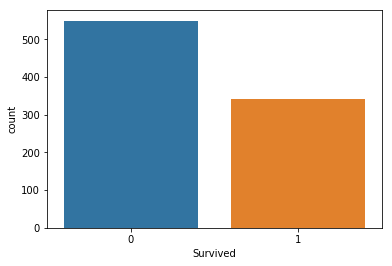

In [81]:
sns.countplot(train1['Survived'])

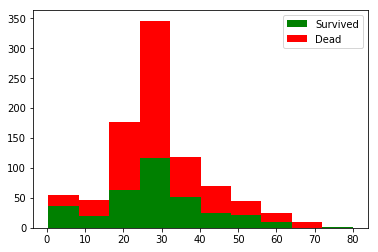

In [82]:
plt.hist(x = [train1[train1['Survived']==1]['Age'], train1[train1['Survived']==0]['Age']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.legend()

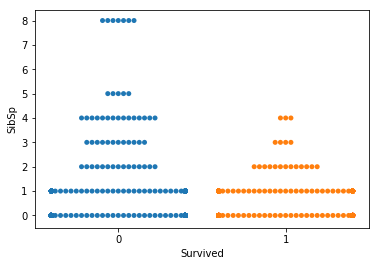

In [83]:
sns.swarmplot('Survived','SibSp',data=train1)

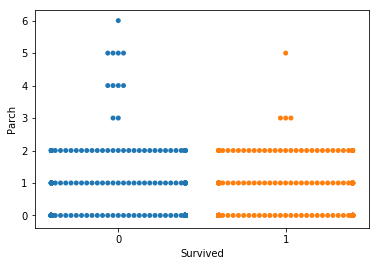

In [84]:
sns.swarmplot('Survived','Parch',data=train1)

### 构造家庭人数的特征--我家到底有几个人？

In [85]:
train1['FamilyNum']=train['SibSp']+train['Parch']+1

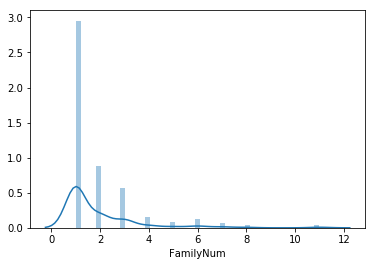

In [86]:
sns.distplot(train1['FamilyNum'])

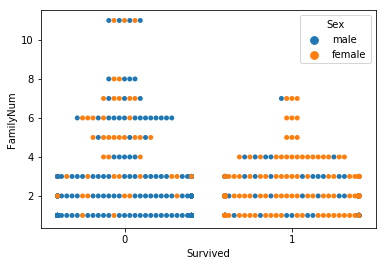

In [87]:
sns.swarmplot('Survived','FamilyNum',data=train1,hue='Sex')

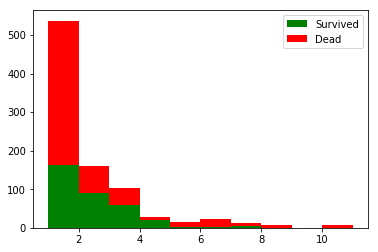

In [89]:
plt.hist(x = [train1[train1['Survived']==1]['FamilyNum'], train1[train1['Survived']==0]['FamilyNum']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.legend()

In [90]:
train1.corr()['Survived']['FamilyNum']

0.01663898928274531

### Embarked 与 Target的关系

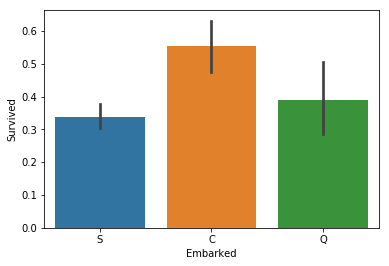

In [91]:
sns.barplot('Embarked','Survived',data=train1)

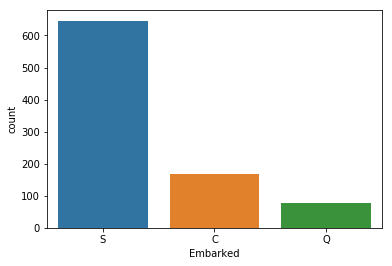

In [93]:
sns.countplot('Embarked',data=train1)

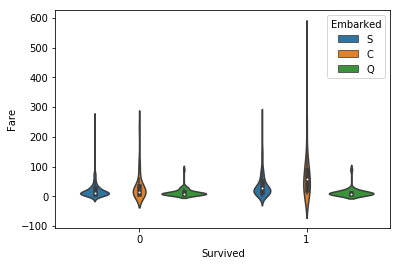

In [94]:
sns.violinplot('Survived','Fare',data=train1,hue='Embarked')

### Pclass对Target的影响

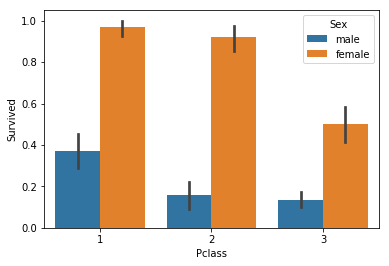

In [95]:
sns.barplot('Pclass','Survived',data=train1,hue='Sex')

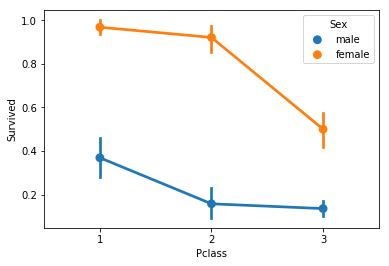

In [96]:
sns.pointplot('Pclass','Survived',data=train1,hue='Sex')

### 单身属性 Alone

In [97]:
train1['Alone']=1

In [100]:
train1['Alone'].loc[train1['FamilyNum']>1]=0

In [101]:
train1[['FamilyNum','Alone']].head()

,FamilyNum,Alone
0,2,0
1,2,0
2,1,1
3,2,0
4,1,1


### 单身的乘客与Target之间的关系

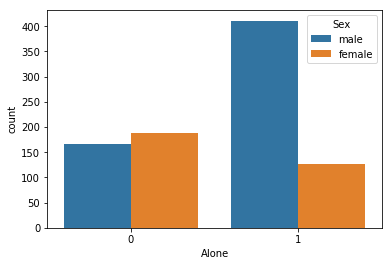

In [102]:
sns.countplot('Alone',hue='Sex',data=train1)

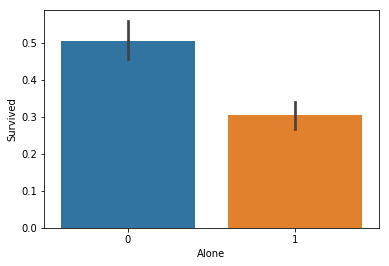

In [103]:
sns.barplot('Alone','Survived',data=train1)

### 课程的剩余内容

1.乘客的名字可以给我们带来什么？

2.年龄分布

3.乘客属于什么阶级？

4.回看EDA分析

5.Categorial的Encoding变换

6.特征的筛选

7.XGBoost的调优

8.SVM算法测试

9.树模型测试(DecisionTree & ExtraTree)

10.模型评测

11.全量数据来袭

12.集成模型

13.神经网络

### 乘客的名字的挖掘

In [105]:
train1.head()['Name']

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [107]:
train1['Name'].str.split(",",expand=True)[1].str.split(".",expand=True)[0].value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Mlle              2
 Major             2
 Col               2
 the Countess      1
 Mme               1
 Capt              1
 Don               1
 Sir               1
 Lady              1
 Jonkheer          1
 Ms                1
Name: 0, dtype: int64

In [108]:
train1['Title']=train1['Name'].str.split(",",expand=True)[1].str.split(".",expand=True)[0]

In [109]:
train1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilyNum,Alone,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,1,Mr


### Title 与 Survival的关系

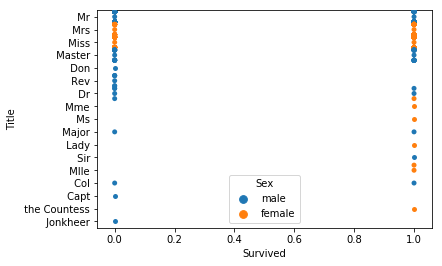

In [110]:
sns.swarmplot("Survived","Title",data=train1,hue="Sex")

### 乘客年龄分布

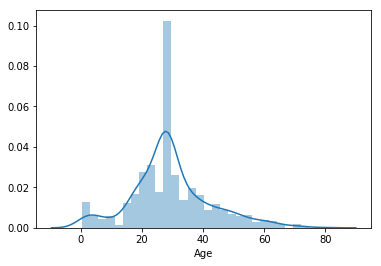

In [112]:
sns.distplot(train1['Age'])

In [113]:
train1['Age'].min()

0.42

In [114]:
#pandas.cut

In [115]:
pd.cut(train1['Age'].astype(int),8).value_counts()

(20.0, 30.0]     408
(30.0, 40.0]     155
(10.0, 20.0]     116
(40.0, 50.0]      84
(-0.08, 10.0]     64
(50.0, 60.0]      42
(60.0, 70.0]      18
(70.0, 80.0]       4
Name: Age, dtype: int64

In [116]:
train1['AgeRange']=pd.cut(train1['Age'].astype(int),8)

In [117]:
type(train1.head()['AgeRange'][0])

pandas._libs.interval.Interval

### 乘客的阶层进行切分

In [118]:
train1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilyNum,Alone,Title,AgeRange
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,0,Mr,"(20.0, 30.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,0,Mrs,"(30.0, 40.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1,Miss,"(20.0, 30.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,0,Mrs,"(30.0, 40.0]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,1,Mr,"(30.0, 40.0]"


In [119]:
# pd.qcut(train1['Fare'])

/Users/deepglint/miniconda2/envs/python3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


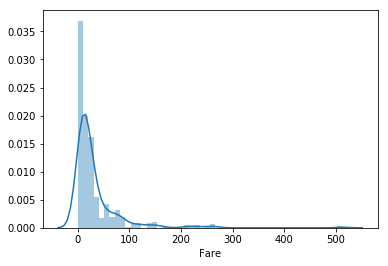

In [120]:
sns.distplot(train['Fare'])

In [121]:
pd.qcut(train1['Fare'],4).value_counts()

(7.91, 14.454]     224
(-0.001, 7.91]     223
(31.0, 512.329]    222
(14.454, 31.0]     222
Name: Fare, dtype: int64

In [122]:
train1['FareRange']=pd.qcut(train1['Fare'],4)

In [124]:
train1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilyNum,Alone,Title,AgeRange,FareRange
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,0,Mr,"(20.0, 30.0]","(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,0,Mrs,"(30.0, 40.0]","(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1,Miss,"(20.0, 30.0]","(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,0,Mrs,"(30.0, 40.0]","(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,1,Mr,"(30.0, 40.0]","(7.91, 14.454]"


### 对乘客的Title增加其他类型

In [125]:
other_titles=(train1['Title'].value_counts()<10)

In [126]:
other_titles

 Mr              False
 Miss            False
 Mrs             False
 Master          False
 Dr               True
 Rev              True
 Mlle             True
 Major            True
 Col              True
 the Countess     True
 Mme              True
 Capt             True
 Don              True
 Sir              True
 Lady             True
 Jonkheer         True
 Ms               True
Name: Title, dtype: bool

In [127]:
train1['Title']=train1['Title'].apply(lambda x: 'Other' if  other_titles.loc[x]==True else x)

### 新一轮的EDA

#### 1.生还率统计

Categorial的数据情况下，去统计乘客的生还率有多少？

In [128]:
##groupby,mean()

train1[['Sex','Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [130]:
train1[['AgeRange','Survived']].groupby('AgeRange').mean()

,Survived
AgeRange,
"(-0.08, 10.0]",0.593750
"(10.0, 20.0]",0.379310
"(20.0, 30.0]",0.333333
"(30.0, 40.0]",0.445161
"(40.0, 50.0]",0.392857
"(50.0, 60.0]",0.404762
"(60.0, 70.0]",0.222222
"(70.0, 80.0]",0.250000


In [132]:
train1[['FareRange','Survived']].groupby('FareRange').mean()

,Survived
FareRange,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [134]:
### 把所有的Categorial属性进行一个统计

columns=train1.columns

for x in columns:
    if train1[x].dtype !='float64' and (x not in ['Survived','PassengerId','Name','Ticket']):
        print(x)
        print('{0}的生还率统计:'.format(x))
        print(train1[[x,'Survived']].groupby(x).mean())
        print('##'*5)

Pclass
Pclass的生还率统计:
        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363
##########
Sex
Sex的生还率统计:
        Survived
Sex             
female  0.742038
male    0.188908
##########
SibSp
SibSp的生还率统计:
       Survived
SibSp          
0      0.345395
1      0.535885
2      0.464286
3      0.250000
4      0.166667
5      0.000000
8      0.000000
##########
Parch
Parch的生还率统计:
       Survived
Parch          
0      0.343658
1      0.550847
2      0.500000
3      0.600000
4      0.000000
5      0.200000
6      0.000000
##########
Embarked
Embarked的生还率统计:
          Survived
Embarked          
C         0.553571
Q         0.389610
S         0.339009
##########
FamilyNum
FamilyNum的生还率统计:
           Survived
FamilyNum          
1          0.303538
2          0.552795
3          0.578431
4          0.724138
5          0.200000
6          0.136364
7          0.333333
8          0.000000
11         0.000000
##########
Alone
Alone的生还率统计:
       Survived
Alone          
0

In [135]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
FamilyNum      891 non-null int64
Alone          891 non-null int64
Title          891 non-null object
AgeRange       891 non-null category
FareRange      891 non-null category
dtypes: category(2), float64(2), int64(7), object(5)
memory usage: 99.5+ KB


/Users/deepglint/miniconda2/envs/python3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


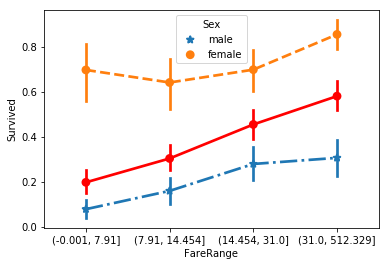

In [136]:
sns.pointplot('FareRange','Survived',data=train1,color='r')
sns.pointplot('FareRange','Survived',data=train1,hue='Sex',markers=['*','o'],linestyles=["-.","--"])

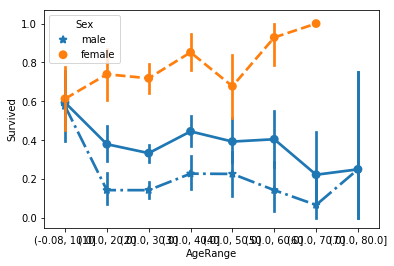

In [137]:
sns.pointplot('AgeRange','Survived',data=train1)
sns.pointplot('AgeRange','Survived',data=train1,hue='Sex',markers=['*','o'],linestyles=["-.","--"])

女性随着年龄的增加，越来越受爱戴，50岁值得注意一下

男性，直到80岁才受到尊重~

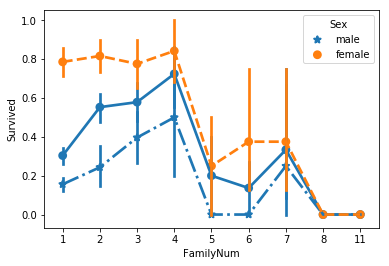

In [138]:
sns.pointplot('FamilyNum','Survived',data=train1)
sns.pointplot('FamilyNum','Survived',data=train1,hue='Sex',markers=['*','o'],linestyles=["-.","--"])


### 生还者与死亡者的年龄分布

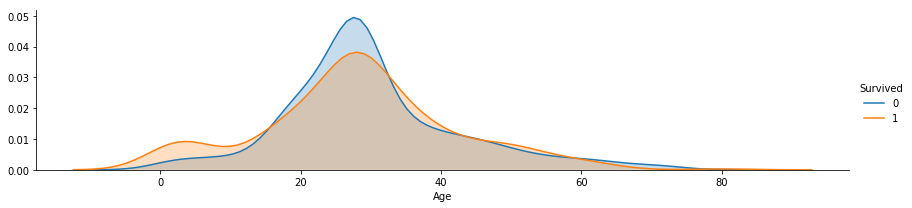

In [139]:
a=sns.FacetGrid(train1,hue='Survived',aspect=4)
a.map(sns.kdeplot,'Age',shade=True)
a.add_legend()

### Categorial数据的Encode

In [140]:
#pd.get_dummies(train1)

### 数据筛选

In [141]:
def TrainAndTestByXGBoost2(train1):
    y=train1['Survived']
    X=pd.get_dummies(train1.drop(['Name','PassengerId','Survived','Ticket'],axis=1))
    X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.2,random_state=123)
    xgclass=xgb.XGBClassifier()
    xgclass.fit(X_train,y_train)
    preds=xgclass.predict(X_test)
    accuracy=(preds==y_test).sum().astype(float)/len(preds)*100
    print("Accuracy:",accuracy)
    


In [143]:
TrainAndTestByXGBoost2(train1)

ValueError: feature_names may not contain [, ] or <

In [149]:
#train1['AgeRange_Cat']=train1['AgeRange'].astype('category')
train1['AgeRange_Cat']=train1['AgeRange'].cat.codes#对于离散的数据进行聚合和编码
#train1['AgeRange_Cat']

In [150]:
#train1['FareRange_Cat']=train1['FareRange'].astype('category')
train1['FareRange_Cat']=train1['FareRange'].cat.codes

In [151]:
train1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilyNum,Alone,Title,AgeRange,FareRange,AgeRange_Cat,FareRange_Cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,0,Mr,"(20.0, 30.0]","(-0.001, 7.91]",2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,0,Mrs,"(30.0, 40.0]","(31.0, 512.329]",3,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1,Miss,"(20.0, 30.0]","(7.91, 14.454]",2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,0,Mrs,"(30.0, 40.0]","(31.0, 512.329]",3,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,1,Mr,"(30.0, 40.0]","(7.91, 14.454]",3,1


In [153]:
TrainAndTestByXGBoost2(train1.drop(['AgeRange','FareRange'],axis=1))

Accuracy: 86.03351955307262


In [154]:
### 将Range转成str为了规避数值带来的影响

train1['FareRange_Cat']=train1['FareRange_Cat'].astype('str')
train1['AgeRange_Cat']=train1['AgeRange_Cat'].astype('str')


In [155]:
TrainAndTestByXGBoost2(train1.drop(['AgeRange','FareRange'],axis=1))

Accuracy: 86.03351955307262


In [189]:
TrainAndTestByXGBoost2(train1.drop(['AgeRange','FareRange_Cat','FareRange','AgeRange_Cat','Fare'],axis=1))

Accuracy: 87.70949720670392


### XGBoost做优化

In [195]:
def TrainAndTestByXGBoost3(train1):
    y=train1['Survived']
    X=pd.get_dummies(train1.drop(['Name','PassengerId','Survived','Ticket'],axis=1))
    X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.2,random_state=123)
    xgclass=xgb.XGBClassifier(
        n_estimators=2000,
        learning_rate=0.01,
#         max_depth=20,
        subsample=0.8,
        objective="binary:logistic"
    )
    xgclass.fit(X_train,y_train)
    preds=xgclass.predict(X_test)
    accuracy=(preds==y_test).sum().astype(float)/len(preds)*100
    print("Accuracy:",accuracy)
    


In [196]:
TrainAndTestByXGBoost3(train1.drop(['AgeRange','FareRange_Cat','FareRange','AgeRange_Cat','Fare'],axis=1))

Accuracy: 88.26815642458101


In [232]:
xg_class=xgb.XGBClassifier(n_estimators=500,
        learning_rate=0.01,
#         max_depth=20,
        subsample=0.8,
        objective="binary:logistic")

In [233]:
xg_class.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.8)

In [234]:
#xg_class.predict(X_test)

In [235]:
pred=xg_class.predict_proba(X_test)

In [236]:
pred[:,1]

array([0.61584806, 0.10104313, 0.46838126, 0.22110704, 0.18090843,
       0.0999344 , 0.8646104 , 0.9297167 , 0.60593045, 0.6144931 ,
       0.30584997, 0.5689684 , 0.95057064, 0.131854  , 0.937015  ,
       0.76191866, 0.92968583, 0.38468763, 0.14402513, 0.18297797,
       0.5648803 , 0.92970127, 0.11054084, 0.13424353, 0.12282638,
       0.15471774, 0.1354805 , 0.9515178 , 0.15661812, 0.1299127 ,
       0.17840607, 0.9059622 , 0.17511646, 0.23260334, 0.19591275,
       0.71649384, 0.06330068, 0.08926164, 0.8386921 , 0.31297073,
       0.9416579 , 0.18604922, 0.569547  , 0.14549594, 0.13182092,
       0.13790444, 0.95313716, 0.35554972, 0.1388659 , 0.9067382 ,
       0.6364966 , 0.18261813, 0.14706314, 0.1457509 , 0.13254568,
       0.10104313, 0.06988996, 0.16486058, 0.44412443, 0.06934071,
       0.9673712 , 0.9370127 , 0.73245734, 0.96028244, 0.13106109,
       0.15486816, 0.12840435, 0.1252805 , 0.39723307, 0.8717862 ,
       0.9580084 , 0.11056607, 0.42357954, 0.2906814 , 0.14847

In [237]:
#threds=[0.1,0.15,0.2,0.25,0.3,0.35........0.9]

In [238]:
# dots=[]
# for t in threds:
#     dots.append(get_PR(pred,y_test,t))

In [239]:
#plt.plot(dots[:0],dots[:1])

### 绘制PR曲线

In [240]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

In [241]:
precision,recall,thres=precision_recall_curve(y_test.tolist(),probas_pred=pred[:,1])
ap=average_precision_score(y_test.tolist(),pred[:,1])

Text(0.5, 1.0, 'P-R Curve with AP:0.86')

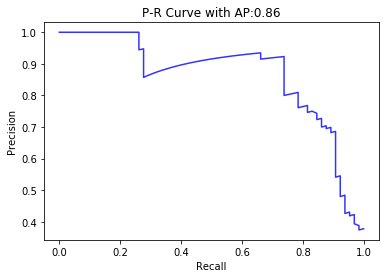

In [242]:
plt.plot(recall,precision,color='b',alpha=0.8)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title("P-R Curve with AP:{0:0.2f}".format(ap))

In [243]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 329 to 510
Data columns (total 10 columns):
Pclass        712 non-null int64
Age           712 non-null float64
SibSp         712 non-null int64
Parch         712 non-null int64
Fare          712 non-null float64
Sex_female    712 non-null uint8
Sex_male      712 non-null uint8
Embarked_C    712 non-null uint8
Embarked_Q    712 non-null uint8
Embarked_S    712 non-null uint8
dtypes: float64(2), int64(3), uint8(5)
memory usage: 36.9 KB


In [244]:
import warnings
warnings.filterwarnings('ignore')

### 绘制ROC曲线

In [245]:
from sklearn.metrics import roc_curve,roc_auc_score

In [246]:
fpr,tpr,_=roc_curve(y_test,pred[:,1])

In [247]:
auc=roc_auc_score(y_test,pred[:,1])

Text(0, 0.5, 'TPR')

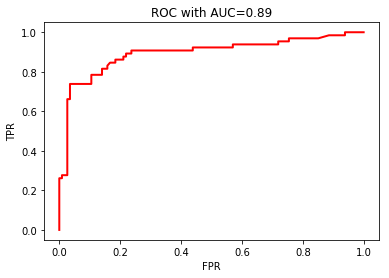

In [248]:
plt.plot(fpr,tpr,lw=2,color='r')
plt.title('ROC with AUC=%0.2f' % (auc))
plt.xlabel('FPR')
plt.ylabel('TPR')

In [249]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,preds))

0.8603351955307262


In [269]:
def TrainAndTestByXGBoost4(train1):
    y=train1['Survived']
    X=pd.get_dummies(train1.drop(['Name','PassengerId','Survived','Ticket'],axis=1))
    X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.2,random_state=123)
    xgclass=xgb.XGBClassifier(
        n_estimators=2100,
        max_depth=20,
        subsample=0.8,
        objective="binary:logistic",
        learning_rate=0.0015,
    )
    xgclass.fit(X_train,y_train)
    preds=xgclass.predict(X_test)
    probas=xgclass.predict_proba(X_test)
    ####生成PR、ROC曲线####
    precision,recall,_=precision_recall_curve(y_test.tolist(),probas_pred=probas[:,1])
    fpr,tpr,_=roc_curve(y_test,probas[:,1])
    auc=roc_auc_score(y_test,probas[:,1])
    print("Drawing PR Curve")
    plt.subplot(3,1,1)
    ap=average_precision_score(y_test,probas[:,1])
    plt.step(recall,precision,color='b')
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("PR-Curve with AP:{0:0.2f}".format(ap))
    print("Drawing ROC Curve")
    plt.subplot(3,1,3)
    plt.plot(fpr,tpr,lw=2,color='r')
    plt.title("ROC with AUC= %0.2f" % (auc))
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    print("With Accuracy:")
    print(accuracy_score(y_test,preds))
    

Drawing PR Curve
Drawing ROC Curve
With Accuracy:
0.8715083798882681


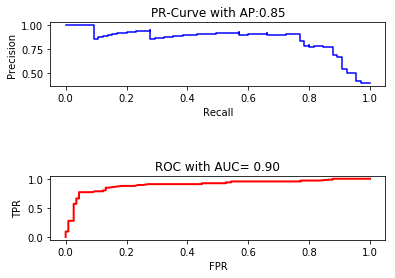

In [267]:
TrainAndTestByXGBoost4(train1.drop(['AgeRange','FareRange_Cat','FareRange','AgeRange_Cat','Fare'],axis=1))

Drawing PR Curve
Drawing ROC Curve
With Accuracy:
0.8938547486033519


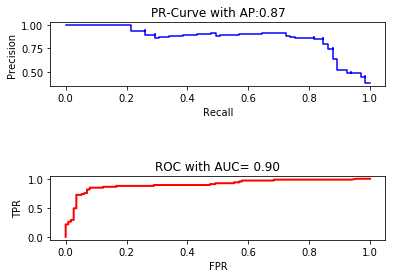

In [270]:
TrainAndTestByXGBoost4(train1.drop(['AgeRange','FareRange','AgeRange_Cat'],axis=1))

### 其他分类算法进行实验

#### AdaBoost

In [271]:
from sklearn import ensemble

In [284]:
ada_class=ensemble.AdaBoostClassifier(n_estimators=10000,learning_rate=0.1)

In [285]:
def TrainAndTestByAlg(train1,alg):
    y=train1['Survived']
    X=pd.get_dummies(train1.drop(['Name','PassengerId','Survived','Ticket'],axis=1))
    X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.2,random_state=123)
    alg.fit(X_train,y_train)
    preds=alg.predict(X_test)
    probas=alg.predict_proba(X_test)
    precision,recall,_=precision_recall_curve(y_test.tolist(),probas_pred=probas[:,1])
    fpr,tpr,_=roc_curve(y_test,probas[:,1])
    auc=roc_auc_score(y_test,probas[:,1])
    print("Drawing PR Curve")
    plt.subplot(3,1,1)
    ap=average_precision_score(y_test,probas[:,1])
    plt.step(recall,precision,color='b')
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("PR-Curve with AP:{0:0.2f}".format(ap))
    print("Drawing ROC Curve")
    plt.subplot(3,1,3)
    plt.plot(fpr,tpr,lw=2,color='r')
    plt.title("ROC with AUC= %0.2f" % (auc))
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    print("With Accuracy:")
    print(accuracy_score(y_test,preds))

Drawing PR Curve
Drawing ROC Curve
With Accuracy:
0.8715083798882681


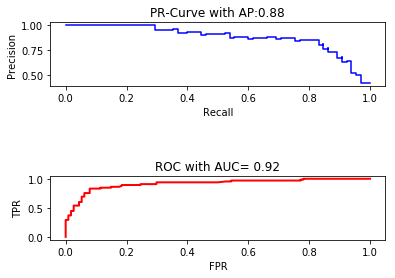

In [286]:
TrainAndTestByAlg(train1.drop(['AgeRange','FareRange','AgeRange_Cat'],axis=1),ada_class)

#### Bagging

In [297]:
bg_class=ensemble.BaggingClassifier(n_estimators=1000,max_samples=0.4,max_features=0.6)

Drawing PR Curve
Drawing ROC Curve
With Accuracy:
0.88268156424581


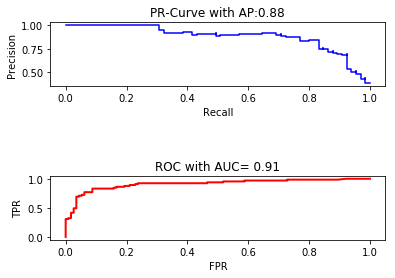

In [298]:
TrainAndTestByAlg(train1.drop(['AgeRange','FareRange','AgeRange_Cat'],axis=1),bg_class)

#### GBDT

In [325]:
gb_class=ensemble.GradientBoostingClassifier(n_estimators=1200,max_features=0.6,learning_rate=0.01,subsample=0.6)

In [326]:
gb_class

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=0.6, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1200,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=0.6, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

Drawing PR Curve
Drawing ROC Curve
With Accuracy:
0.888268156424581


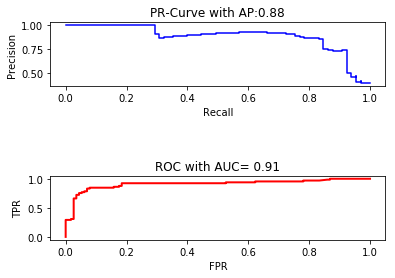

In [327]:
TrainAndTestByAlg(train1.drop(['AgeRange','FareRange','AgeRange_Cat'],axis=1),gb_class)

In [350]:
rf_class=ensemble.RandomForestClassifier(n_estimators=1200,max_features=0.9,max_depth=7)

In [351]:
rf_class

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features=0.9, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Drawing PR Curve
Drawing ROC Curve
With Accuracy:
0.8770949720670391


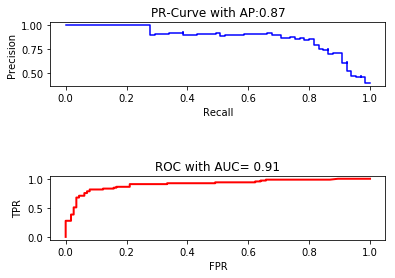

In [352]:
TrainAndTestByAlg(train1.drop(['AgeRange','FareRange','AgeRange_Cat'],axis=1),rf_class)

#### ExtraTree

当特征属性是类别的形式时，随机选择具有某些类别的样本为左分支，而把具有其他类别的样本作为右分支；当特征属性是数值的形式时，随机选择一个处于该特征属性的最大值和最小值之间的任意数，当样本的该特征属性值大于该值时，作为左分支，当小于该值时，作为右分支。这样就实现了在该特征属性下把样本随机分配到两个分支上的目的。然后计算此时的分叉值（如果特征属性是类别的形式，可以应用基尼指数；如果特征属性是数值的形式，可以应用均方误差）。遍历节点内的所有特征属性，按上述方法得到所有特征属性的分叉值，我们选择分叉值最大的那种形式实现对该节点的分叉。从上面的介绍可以看出，这种方法比随机森林的随机性更强。

使用均值进行合并

具有极强的随机性

In [395]:
et_class=ensemble.ExtraTreesClassifier(n_estimators=500,max_depth=7,max_features=0.6,bootstrap=True)

In [396]:
et_class

ExtraTreesClassifier(bootstrap=True, class_weight=None, criterion='gini',
           max_depth=7, max_features=0.6, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

Drawing PR Curve
Drawing ROC Curve
With Accuracy:
0.8379888268156425


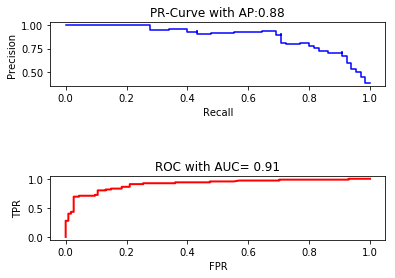

In [397]:
TrainAndTestByAlg(train1.drop(['AgeRange','FareRange','AgeRange_Cat'],axis=1),et_class)

#### MLPClassifier

In [398]:
from sklearn.neural_network import MLPClassifier

In [415]:
from sklearn import linear_model

In [409]:
mlp_class=MLPClassifier(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(30,40),max_iter=200,activation='relu',random_state=123)

Drawing PR Curve
Drawing ROC Curve
With Accuracy:
0.8435754189944135


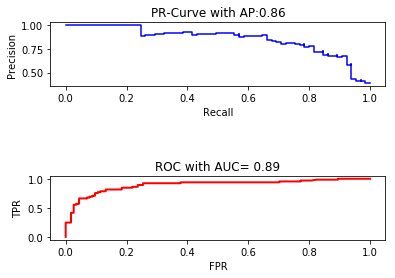

In [410]:
TrainAndTestByAlg(train1.drop(['AgeRange','FareRange','AgeRange_Cat'],axis=1),mlp_class)

### 绘制不同算法的PR曲线以及ROC曲线

In [412]:
predicts={}
predict_probas={}
pr={}
rc={}
fpr={}
tpr={}
ap={}
auc={}
names=[]


In [413]:
MLA_Columns=['MLA Name','MLA Parameters','MLA Train Accu Mean','MLA Test Accu Mean','MLA Test Accu STD','MLA Time']

In [419]:
MLA_collection=[
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),
    linear_model.LogisticRegressionCV(),
    xgb.XGBClassifier(),
    MLPClassifier()
]

No handles with labels found to put in legend.


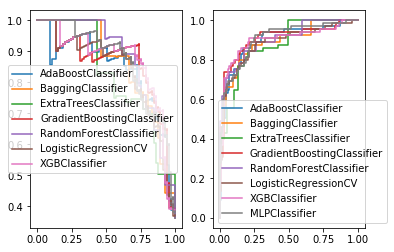

In [422]:
for alg in MLA_collection:
    MLA_name=alg.__class__.__name__
    alg.fit(X_train,y_train)
    predicts[MLA_name]=alg.predict(X_test)
    predict_probas[MLA_name]=alg.predict_proba(X_test)[:,1]
    pr[MLA_name],rc[MLA_name],_=precision_recall_curve(y_test,predict_probas[MLA_name])
    fpr[MLA_name],tpr[MLA_name],_=roc_curve(y_test,predict_probas[MLA_name])
    ap[MLA_name]=average_precision_score(y_test,predict_probas[MLA_name])
    auc[MLA_name]=roc_auc_score(y_test,predict_probas[MLA_name])
    names.append(MLA_name)
    plt.subplot(1,2,1)
    plt.legend()
    plt.step(rc[MLA_name],pr[MLA_name],label=MLA_name)
    plt.subplot(1,2,2)
    plt.step(fpr[MLA_name],tpr[MLA_name],label=MLA_name)
    plt.legend()

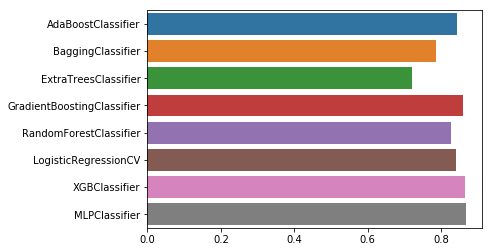

In [423]:
sns.barplot(y=names,x=[ap[i] for i in names])

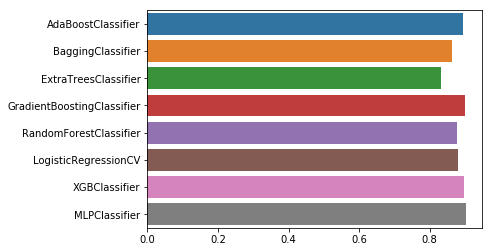

In [424]:
sns.barplot(y=names,x=[auc[i] for i in names])

#### 模型的搜索与投票

In [436]:
grid_n_estimator=[100,500,800,1000,1200]
grid_max_depth=[4,5,6,7,8,9,10,12,15]
grid_min_samples=[5, 10, .03, .05, .10]
grid_seed=[123,88,176,258]
grid_learn = [.01, .03, .05, .1, .25]
grid_ratio = [.1, .25, .5, .75, 1.0]
grid_criterion = ['gini', 'entropy']

In [437]:
grid_param=[
    {
        #Adaboost
        'n_estimators':grid_n_estimator,
        'learning_rate':grid_learn,
        'random_state':grid_seed,
    },{
        #Bagging
        'n_estimators':grid_n_estimator,
        'max_samples':grid_ratio,
        'random_state':grid_seed,
    },{
        ###ExtraTree
        'n_estimators':grid_n_estimator,
        'criterion':grid_criterion,
        'random_state':grid_seed,
        'max_depth':grid_max_depth,
    },{
        ###GBDT
        'learning_rate':grid_learn,
        'n_estimators':grid_n_estimator,
        'max_depth': grid_max_depth, #default=3   
        'random_state': grid_seed,
    },{
        ###RandomForest
        'n_estimators': grid_n_estimator, #default=10
        'criterion': grid_criterion, #default=”gini”
        'max_depth': grid_max_depth, #default=None
        'random_state':grid_seed,
    },{
        ###LogisticRegression
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
        'random_state':grid_seed,
    },{
        ###XGBoost
        'learning_rate': grid_learn, #default: .3
        'max_depth': [1,2,4,6,8,10], #default 2
        'n_estimators': grid_n_estimator, 
        'seed': grid_seed
    }
]

In [438]:
vote_alg=[
    ('ada',ensemble.AdaBoostClassifier()),
    ('bc',ensemble.BaggingClassifier()),
    ('etc',ensemble.ExtraTreesClassifier()),
    ('gbc',ensemble.GradientBoostingClassifier()),
    ('rfc',ensemble.RandomForestClassifier()),
    ('lr',linear_model.LogisticRegressionCV()),
    ('xgb',xgb.XGBClassifier())
]

In [ ]:
import time
start_total=time.perf_counter()
for cf ,param in zip(vote_alg,grid_param):
    start=time.perf_counter()
    gs=model_selection.GridSearchCV(estimator=cf[1],param_grid=param,cv=5,scoring='roc_auc')
    gs.fit(X_train,y_train)
    run=time.perf_counter()-start
    best_param=gs.best_params_
    print("Best Param for {0} is {1},with time expense {2},with Score:{3}".format(cf[1].__class__.__name__,best_param,run,gs.cv_results_['mean_test_score']))
    cf[1].set_params(**best_param)

#### 进行投票

In [ ]:
vote_soft=ensemble.VotingClassifier(estimators=vote_alg,voting='soft')

In [ ]:
TrainAndTestByAlg(train1.drop(['AgeRange','FareRange'],axis=1),vote_soft)

小作业：用网上测试集进行评测，并提交结果